<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 1 to 331
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  331 non-null    datetime64[ns]
 1   City of London        331 non-null    float64       
 2   Barking & Dagenham    331 non-null    float64       
 3   Barnet                331 non-null    float64       
 4   Bexley                331 non-null    float64       
 5   Brent                 331 non-null    float64       
 6   Bromley               331 non-null    float64       
 7   Camden                331 non-null    float64       
 8   Croydon               331 non-null    float64       
 9   Ealing                331 non-null    float64       
 10  Enfield               331 non-null    float64       
 11  Greenwich             331 non-null    float64       
 12  Hackney               331 non-null    float64       
 13  Hammersmith & Fulham

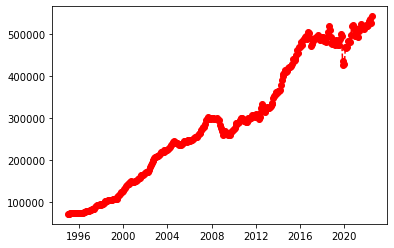

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1995 to 2022
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    28 non-null     float64
 1   Barnet                28 non-null     float64
 2   Bexley                28 non-null     float64
 3   Brent                 28 non-null     float64
 4   Bromley               28 non-null     float64
 5   Camden                28 non-null     float64
 6   Croydon               28 non-null     float64
 7   Ealing                28 non-null     float64
 8   Enfield               28 non-null     float64
 9   Greenwich             28 non-null     float64
 10  Hackney               28 non-null     float64
 11  Hammersmith & Fulham  28 non-null     float64
 12  Haringey              28 non-null     float64
 13  Harrow                28 non-null     float64
 14  Havering              28 non-null     float64
 15  Hillingdon          

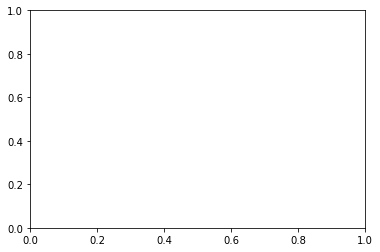

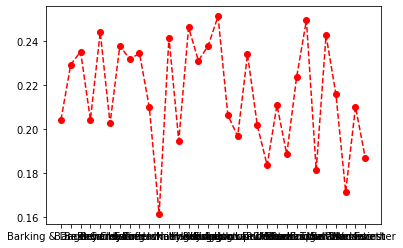

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_1774/3400126728.py:372: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newproperties.index,rotation=90)


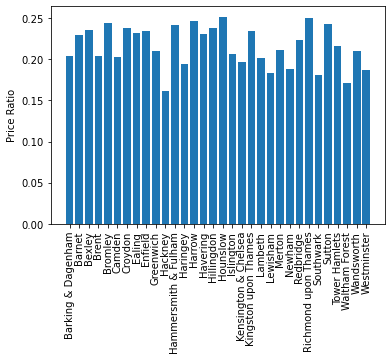

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_1774/3400126728.py:449: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(price_ratio.index,rotation=90)


Hounslow 0.25148317824115635
Hackney 0.16133493530705728


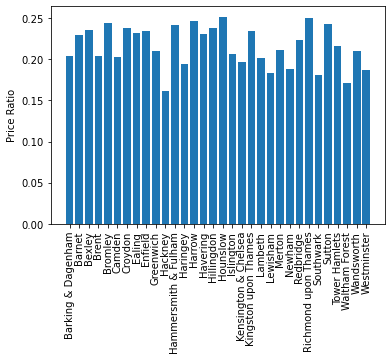

year,1998,2018,ratio
Hackney,87869.535804,544640.475028,0.161335
Waltham Forest,75557.474132,440859.411128,0.171387
Southwark,91405.187779,504235.374945,0.181275


In [1]:


# ### 1. Sourcing and Loading 
# 
# Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 
# 
# ***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

# #### 1.1. Importing Libraries

# In[1]:


# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np
import pandas as pd


# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib as plt


# #### 1.2.  Loading the data
# Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

# In[2]:


# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)


# ### 2. Cleaning, transforming, and visualizing
# This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.
# 
# The end goal of data cleaning is to have tidy data. When data is tidy: 
# 
# 1. Each variable has a column.
# 2. Each observation forms a row.
# 
# Keep the end goal in mind as you move through this process, every step will take you closer. 
# 
# 
# 
# ***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
# - Intermediate Python for data science, all modules.
# - pandas Foundations, all modules. 
# - Manipulating DataFrames with pandas, all modules.
# - Data Types for Data Science, Module Four.
# - Python Data Science Toolbox - Part One, all modules

# **2.1. Exploring your data** 
# 
# Think about your pandas functions for checking out a dataframe. 

# In[3]:


properties.head()


# In[4]:


properties = properties.rename(columns={'Unnamed: 0': 'Date'})
properties.head()


# In[5]:


properties.drop([0], inplace = True)


# In[6]:


properties.head()


# In[7]:


for column in properties.columns:
    if properties[column].dtype == 'object':
        properties[column] = properties[column].astype(np.float64)


# In[8]:


properties = properties.drop(properties.columns[[34, 37, 47]], axis=1)


# In[9]:


properties.info()


# In[10]:


properties.columns


# In[11]:


londonboroughs = ['Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster'] 
len(londonboroughs)


# In[12]:


updatedproperties = properties[['Date','Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster']].copy()


# In[13]:


updatedproperties


# In[14]:


properties.shape


# In[15]:


properties.describe()


# **2.2. Cleaning the data**
# 
# You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).
# 
# Don't be afraid to use StackOverflow for help  with this.

# In[16]:


properties.index


# **2.3. Cleaning the data (part 2)**
# 
# You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

# **2.4.Transforming the data**
# 
# Remember what Wes McKinney said about tidy data? 
# 
# You might need to **melt** your DataFrame here. 

# Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

# In[17]:


updatedproperties.head()


# **2.5. Cleaning the data (part 3)**
# 
# Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 
# 
# Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

# **2.6. Visualizing the data**
# 
# To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?
# 
# 

# In[18]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(updatedproperties["Date"], updatedproperties["Brent"], marker="o", linestyle="--", color="r")
plt.show()


# To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 
# 
# To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
# 1. look through the `Month` column
# 2. extract the year from each individual value in that column 
# 3. store that corresponding year as separate column. 
# 
# Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

# In[19]:


updatedproperties["year"] = updatedproperties["Date"].dt.year
updatedproperties.head()


# In[20]:


updatedproperties.groupby(['year']).mean()


# In[21]:


propertiesgroupbyyear = updatedproperties.groupby(['year']).mean()


# In[22]:


#propertiesgroupbyyear = propertiesgroupbyyear.reset_index()


# In[23]:


propertiesgroupbyyear.head()


# In[24]:


propertiesgroupbyyear.info()


# In[35]:


propertiesgroupbyyear




# In[37]:


updatedpropertiesgroupbyyear=propertiesgroupbyyear.transpose()
updatedpropertiesgroupbyyear


# In[42]:


newproperties=updatedpropertiesgroupbyyear[[1998,2018]].copy()
newproperties


# In[43]:


newproperties['ratio'] = newproperties[1998]/ newproperties[2018]
newproperties


# In[45]:


fig, ax = plt.subplots()
newproperties.index


# In[46]:


newproperties["ratio"]


# In[47]:


fig, ax = plt.subplots()
ax.plot(newproperties.index, newproperties["ratio"], marker="o", linestyle="--", color="r")
plt.show()


# In[55]:


fig, ax = plt.subplots()
ax.bar(newproperties.index, newproperties["ratio"])
ax.set_xticklabels(newproperties.index,rotation=90)
ax.set_ylabel("Price Ratio")
plt.show()


# In[52]:


newproperties['ratio'].idxmax()


# In[58]:


print(newproperties['ratio'].idxmax(),newproperties['ratio'].max())


# In[60]:



# In[ ]:





# **3. Modeling**
# 
# Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.
# 
# Consider calling this function create_price_ratio.
# 
# You'd want this function to:
# 1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
# 2. Get the Average Price for that Borough, for the years 1998 and 2018.
# 4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
# 5. Return that ratio.
# 
# Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.
# 
# Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 
# 
# ***Hint***: This section should test the skills you acquired in:
# - Python Data Science Toolbox - Part One, all modules

# In[99]:


#solution2: defining function
def creat_price_ratio(df,y1,y2):
    updateddf=df.transpose()
    newdf=updateddf[[y1,y2]].copy()
    newdf['ratio']=newdf[y1]/newdf[y2]
    return newdf
price_ratio=creat_price_ratio(propertiesgroupbyyear,1998,2018)
price_ratio



#1updatedpropertiesgroupbyyear=propertiesgroupbyyear.transpose()
#2newproperties=updatedpropertiesgroupbyyear[[1998,2018]].copy()
#3newproperties['ratio'] = newproperties[1998]/ newproperties[2018]
#4maxratio


# In[100]:


print(price_ratio['ratio'].idxmin(),price_ratio['ratio'].min())


# In[123]:


fig, ax = plt.subplots()
ax.bar(price_ratio.index, price_ratio["ratio"])
ax.set_xticklabels(price_ratio.index,rotation=90)
ax.set_ylabel("Price Ratio")
plt.show()

price_ratio.sort_values(by=['ratio'],inplace=True)
price_ratio.iloc[0:3]


# ### 4. Conclusion
# What can you conclude? Type out your conclusion below. 
# 
# Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 
# 
# We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

# In[125]:


#The London boroughs that have shown the greatest increase in housing prices, on average, over the last two decades include Hackney, Waltham Forest,and southwark respectively. ##
